In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# conda install scikit-learn

Load 2016 and 2017 data. There are 39,882 rows.

In [2]:
df = pd.read_csv(r"data/raw/resale-flat-prices-from-2016-to-2017.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0
...,...,...,...,...,...,...,...,...,...,...,...
39877,2017-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,13 TO 15,142.0,Apartment,1988,69 years 11 months,540000.0
39878,2017-12,YISHUN,EXECUTIVE,352,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,69 years 07 months,510000.0
39879,2017-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,13 TO 15,147.0,Apartment,1987,68 years 09 months,560000.0
39880,2017-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,142.0,Apartment,1987,68 years 11 months,620000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39882 entries, 0 to 39881
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                39882 non-null  object 
 1   town                 39882 non-null  object 
 2   flat_type            39882 non-null  object 
 3   block                39882 non-null  object 
 4   street_name          39882 non-null  object 
 5   storey_range         39882 non-null  object 
 6   floor_area_sqm       39882 non-null  float64
 7   flat_model           39882 non-null  object 
 8   lease_commence_date  39882 non-null  int64  
 9   remaining_lease      39882 non-null  object 
 10  resale_price         39882 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 3.3+ MB


Check for duplicates and drop duplicates, keeping the last instance of it. There are 39,700 rows after removing duplicates.

In [4]:
df_dup = df[df.duplicated()]
df_dup.shape

(182, 11)

In [5]:
df_dup

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
416,2016-01,CLEMENTI,3 ROOM,450,CLEMENTI AVE 3,04 TO 06,82.0,New Generation,1980,63,410000.0
897,2016-01,SENGKANG,4 ROOM,436D,FERNVALE RD,13 TO 15,96.0,Model A,2010,93,455000.0
2041,2016-02,SEMBAWANG,4 ROOM,467,ADMIRALTY DR,07 TO 09,102.0,Premium Apartment,2001,84,365000.0
2517,2016-03,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,63,340000.0
5529,2016-04,TAMPINES,3 ROOM,830,TAMPINES ST 82,01 TO 03,70.0,Simplified,1986,68,315000.0
...,...,...,...,...,...,...,...,...,...,...,...
39253,2017-12,PUNGGOL,4 ROOM,207B,PUNGGOL PL,10 TO 12,92.0,Model A,2014,95 years 06 months,470000.0
39724,2017-12,WOODLANDS,4 ROOM,554,WOODLANDS DR 53,07 TO 09,90.0,Model A2,1999,81 years,325000.0
39773,2017-12,WOODLANDS,5 ROOM,572B,WOODLANDS AVE 1,10 TO 12,112.0,Improved,2013,94 years 11 months,468000.0
39875,2017-12,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,66 years 03 months,468000.0


In [6]:
df = df.drop_duplicates(keep='last')
df.shape

(39700, 11)

Histograms and getting the counts of distinct values for features and target.

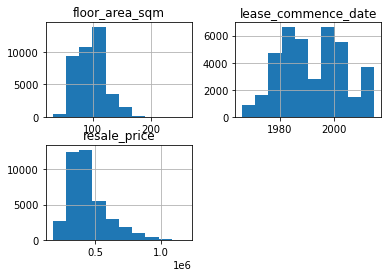

In [7]:
df.hist()
plt.show()

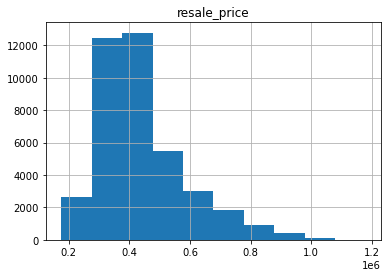

380000.0    604
400000.0    600
420000.0    570
350000.0    562
430000.0    546
           ... 
543800.0      1
468500.0      1
271888.0      1
370188.0      1
687000.0      1
Name: resale_price, Length: 1845, dtype: int64
1845


In [8]:
df.hist(column='resale_price')
plt.show()
print(df['resale_price'].value_counts())
print(df['resale_price'].value_counts().count())

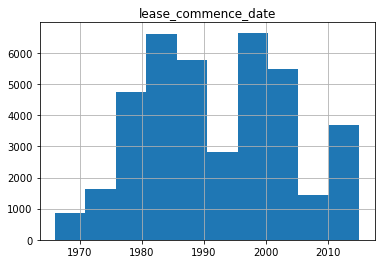

1985    2695
1984    2034
1988    1758
2001    1703
2012    1531
1997    1476
2003    1469
1999    1348
1987    1347
1998    1326
2000    1315
1978    1297
2013    1291
1986    1259
1996    1184
1979    1077
1989    1075
1980    1064
2002    1056
1993     999
2004     858
1992     794
1983     768
1995     738
2011     702
1976     677
1981     669
1977     637
1975     552
1974     453
1982     442
2005     413
2006     403
2008     346
1990     341
1970     338
2009     298
2010     276
1967     237
1994     230
1969     225
1973     224
1971     202
1972     202
2014     131
2007     115
1968      64
1991      42
2015      15
1966       4
Name: lease_commence_date, dtype: int64
50


In [9]:
df.hist(column='lease_commence_date')
plt.show()
print(df['lease_commence_date'].value_counts())
print(df['lease_commence_date'].value_counts().count())

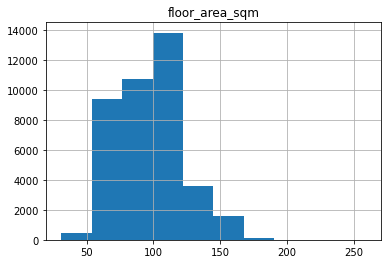

67.0     2405
110.0    2273
104.0    1737
90.0     1466
92.0     1378
         ... 
37.0        1
249.0       1
83.1        1
259.0       1
186.0       1
Name: floor_area_sqm, Length: 156, dtype: int64
156


In [10]:
df.hist(column='floor_area_sqm')
plt.show()
print(df['floor_area_sqm'].value_counts())
print(df['floor_area_sqm'].value_counts().count())

In [11]:
print(df['flat_model'].value_counts())
print(df['flat_model'].value_counts().count())

Model A                   12127
Improved                   9878
New Generation             6191
Premium Apartment          4348
Simplified                 1891
Apartment                  1597
Standard                   1195
Maisonette                 1093
Model A2                    595
DBSS                        474
Type S1                      88
Model A-Maisonette           68
Adjoined flat                61
Type S2                      44
Terrace                      24
Improved-Maisonette           9
Multi Generation              8
Premium Apartment Loft        5
Premium Maisonette            3
2-room                        1
Name: flat_model, dtype: int64
20


In [12]:
print(df['storey_range'].value_counts())
print(df['storey_range'].value_counts().count())

04 TO 06    9356
07 TO 09    8736
10 TO 12    7540
01 TO 03    7110
13 TO 15    3647
16 TO 18    1505
19 TO 21     636
22 TO 24     448
25 TO 27     254
28 TO 30     189
34 TO 36      80
31 TO 33      76
37 TO 39      73
40 TO 42      36
46 TO 48       6
43 TO 45       4
49 TO 51       4
Name: storey_range, dtype: int64
17


In [13]:
print(df['street_name'].value_counts())
print(df['street_name'].value_counts().count())

YISHUN RING RD        655
BEDOK RESERVOIR RD    505
FERNVALE RD           474
PUNGGOL FIELD         458
ANG MO KIO AVE 3      446
                     ... 
BT MERAH LANE 1         2
CLEMENTI ST 12          2
LOWER DELTA RD          1
ZION RD                 1
SENGKANG WEST WAY       1
Name: street_name, Length: 522, dtype: int64
522


In [14]:
print(df['flat_type'].value_counts())
print(df['flat_type'].value_counts().count())

4 ROOM              16543
3 ROOM              10064
5 ROOM               9542
EXECUTIVE            3108
2 ROOM                421
1 ROOM                 14
MULTI-GENERATION        8
Name: flat_type, dtype: int64
7


In [15]:
print(df['town'].value_counts())
print(df['town'].value_counts().count())

JURONG WEST        3058
SENGKANG           2957
WOODLANDS          2896
TAMPINES           2641
YISHUN             2373
BEDOK              2364
PUNGGOL            2216
HOUGANG            1962
ANG MO KIO         1876
CHOA CHU KANG      1773
BUKIT MERAH        1544
BUKIT BATOK        1492
BUKIT PANJANG      1423
KALLANG/WHAMPOA    1328
TOA PAYOH          1300
PASIR RIS          1193
GEYLANG            1079
SEMBAWANG          1036
QUEENSTOWN         1006
CLEMENTI            911
JURONG EAST         884
SERANGOON           858
BISHAN              815
CENTRAL AREA        370
MARINE PARADE       234
BUKIT TIMAH         111
Name: town, dtype: int64
26


Regroup storey to 5 categories.

In [16]:
df.loc[df['storey_range'] == '01 TO 03', 'storey'] = 'low'
df.loc[df['storey_range'] == '04 TO 06', 'storey'] = 'low'
df.loc[df['storey_range'] == '07 TO 09', 'storey'] = 'mid'
df.loc[df['storey_range'] == '10 TO 12', 'storey'] = 'mid'
df.loc[df['storey_range'] == '13 TO 15', 'storey'] = 'high'
df.loc[df['storey_range'] == '16 TO 18', 'storey'] = 'high'
df.loc[df['storey_range'] == '19 TO 21', 'storey'] = 'higher'
df.loc[df['storey_range'] == '22 TO 24', 'storey'] = 'higher'
df.loc[df['storey_range'] == '25 TO 27', 'storey'] = 'higher'
df.loc[df['storey_range'] == '28 TO 30', 'storey'] = 'higher'
df.loc[df['storey_range'] == '31 TO 33', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '34 TO 36', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '37 TO 39', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '40 TO 42', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '43 TO 45', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '46 TO 48', 'storey'] = 'skyscraper'
df.loc[df['storey_range'] == '49 TO 51', 'storey'] = 'skyscraper'

C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey
0,2016-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0,mid
1,2016-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0,low
2,2016-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0,low
3,2016-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0,low
4,2016-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
39877,2017-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,13 TO 15,142.0,Apartment,1988,69 years 11 months,540000.0,high
39878,2017-12,YISHUN,EXECUTIVE,352,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,69 years 07 months,510000.0,low
39879,2017-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,13 TO 15,147.0,Apartment,1987,68 years 09 months,560000.0,high
39880,2017-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,142.0,Apartment,1987,68 years 11 months,620000.0,low


In [18]:
print(df['storey'].value_counts())
print(df['storey'].value_counts().count())

low           16466
mid           16276
high           5152
higher         1527
skyscraper      279
Name: storey, dtype: int64
5


Obtain flat age when it was sold. 

In [19]:
df['month'] = pd.to_datetime(df['month'])
df['yr'] = df['month'].dt.year
df['mth'] = df['month'].dt.month
df['qtr'] = df['month'].dt.quarter
df['age'] = df['yr'] - df['lease_commence_date']

C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39700 entries, 0 to 39881
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                39700 non-null  datetime64[ns]
 1   town                 39700 non-null  object        
 2   flat_type            39700 non-null  object        
 3   block                39700 non-null  object        
 4   street_name          39700 non-null  object        
 5   storey_range         39700 non-null  object        
 6   floor_area_sqm       39700 non-null  float64       
 7   flat_model           39700 non-null  object        
 8   lease_commence_date  39700 non-null  int64         
 9   remaining_lease      39700 non-null  object        
 10  resale_price         39700 non-null  float64       
 11  storey               39700 non-null  object        
 12  yr                   39700 non-null  int64         
 13  mth                  39700 non-

In [21]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey,yr,mth,qtr,age
0,2016-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,62,230000.0,mid,2016,1,1,37
1,2016-01-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,61,240000.0,low,2016,1,1,38
2,2016-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,69,276000.0,low,2016,1,1,30
3,2016-01-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1980,63,280000.0,low,2016,1,1,36
4,2016-01-01,ANG MO KIO,3 ROOM,258,ANG MO KIO AVE 4,01 TO 03,73.0,New Generation,1977,60,285000.0,low,2016,1,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39877,2017-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,13 TO 15,142.0,Apartment,1988,69 years 11 months,540000.0,high,2017,12,4,29
39878,2017-12-01,YISHUN,EXECUTIVE,352,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,69 years 07 months,510000.0,low,2017,12,4,29
39879,2017-12-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,13 TO 15,147.0,Apartment,1987,68 years 09 months,560000.0,high,2017,12,4,30
39880,2017-12-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,142.0,Apartment,1987,68 years 11 months,620000.0,low,2017,12,4,30


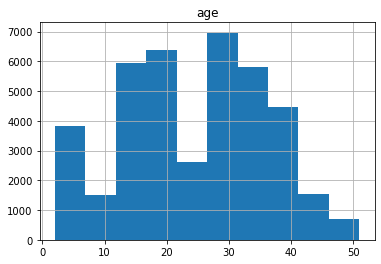

32    2379
31    1962
4     1836
29    1552
16    1505
28    1423
19    1381
33    1379
15    1364
17    1358
20    1340
30    1327
18    1311
14    1272
38    1261
13    1199
5     1080
37    1026
21     984
39     914
36     878
24     869
27     700
40     628
34     625
41     622
23     621
12     597
35     557
6      511
42     504
22     492
25     434
11     410
3      370
43     353
8      321
47     301
7      278
10     259
46     255
9      233
45     216
44     200
26     190
49     147
48     132
50     126
2       15
51       3
Name: age, dtype: int64
50


In [22]:
df.hist(column='age')
plt.show()
print(df['age'].value_counts())
print(df['age'].value_counts().count())

Looking at the oldest (51 years old) and newest (2 years old) sold flats.
Flats sold at 2 years old were all located at Queenstown. This can be considered an outlier considering that HDB flats typically have a minimum occupancy period of 5 years and also that these were all from the same development. Could be a special exception given. I would remove these outliers. 

In [24]:
df[df['age'] == 2]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey,yr,mth,qtr,age
28464,2017-06-01,QUEENSTOWN,3 ROOM,51,C'WEALTH DR,07 TO 09,63.0,Model A,2015,96 years 08 months,550000.0,mid,2017,6,2,2
28475,2017-06-01,QUEENSTOWN,4 ROOM,53,C'WEALTH DR,22 TO 24,96.0,Model A,2015,96 years 08 months,755000.0,higher,2017,6,2,2
28478,2017-06-01,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,28 TO 30,96.0,Model A,2015,96 years 08 months,780000.0,higher,2017,6,2,2
30183,2017-07-01,QUEENSTOWN,2 ROOM,51,C'WEALTH DR,10 TO 12,47.0,Model A,2015,96 years 07 months,360000.0,mid,2017,7,3,2
30203,2017-07-01,QUEENSTOWN,3 ROOM,52,C'WEALTH DR,07 TO 09,63.0,Model A,2015,96 years 07 months,565000.0,mid,2017,7,3,2
32113,2017-08-01,QUEENSTOWN,3 ROOM,53,C'WEALTH DR,28 TO 30,63.0,Model A,2015,96 years 06 months,590000.0,higher,2017,8,3,2
32128,2017-08-01,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,25 TO 27,88.0,Model A,2015,96 years 06 months,738000.0,higher,2017,8,3,2
32142,2017-08-01,QUEENSTOWN,5 ROOM,50,C'WEALTH DR,28 TO 30,114.0,Improved,2015,96 years 06 months,1028000.0,higher,2017,8,3,2
33905,2017-09-01,QUEENSTOWN,3 ROOM,50,C'WEALTH DR,19 TO 21,63.0,Model A,2015,96 years 05 months,588000.0,higher,2017,9,3,2
33919,2017-09-01,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,31 TO 33,96.0,Model A,2015,96 years 05 months,780000.0,skyscraper,2017,9,3,2


In [25]:
df[df['age'] == 51]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey,yr,mth,qtr,age
19855,2017-01-01,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,48 years 09 months,250000.0,low,2017,1,1,51
35223,2017-10-01,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,48 years,200000.0,low,2017,10,4,51
37053,2017-11-01,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,48 years,232000.0,low,2017,11,4,51


In [26]:
def fetch_data(data_path):
    df = pd.read_csv(data_path)
    return df

def regroup_storey(df):
    df.loc[df['storey_range'] == '01 TO 03', 'storey'] = '1-low'
    df.loc[df['storey_range'] == '04 TO 06', 'storey'] = '1-low'
    df.loc[df['storey_range'] == '07 TO 09', 'storey'] = '2-mid'
    df.loc[df['storey_range'] == '10 TO 12', 'storey'] = '2-mid'
    df.loc[df['storey_range'] == '13 TO 15', 'storey'] = '3-high'
    df.loc[df['storey_range'] == '16 TO 18', 'storey'] = '3-high'
    df.loc[df['storey_range'] == '19 TO 21', 'storey'] = '4-higher'
    df.loc[df['storey_range'] == '22 TO 24', 'storey'] = '4-higher'
    df.loc[df['storey_range'] == '25 TO 27', 'storey'] = '4-higher'
    df.loc[df['storey_range'] == '28 TO 30', 'storey'] = '4-higher'
    df.loc[df['storey_range'] == '31 TO 33', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '34 TO 36', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '37 TO 39', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '40 TO 42', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '43 TO 45', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '46 TO 48', 'storey'] = '5-skyscraper'
    df.loc[df['storey_range'] == '49 TO 51', 'storey'] = '5-skyscraper'
    return df

def make_datetime(df):
    df['month'] = pd.to_datetime(df['month'])
    return df

def create_features(df):
    df['yr'] = df['month'].dt.year
    df['mth'] = df['month'].dt.month
    df['qtr'] = df['month'].dt.quarter
    df['age'] = df['yr'] - df['lease_commence_date']
    return df

def process_data(df):
    df = fetch_data(r'data/raw/resale-flat-prices-from-2016-to-2017.csv')
    df = df.drop_duplicates(keep='last')
    df = regroup_storey(df)
    df = make_datetime(df)
    df = create_features(df)
    cols_to_keep = ['town', 'flat_type', 'street_name', 'floor_area_sqm', 'flat_model', 
                    'lease_commence_date', 'resale_price', 'storey', 'yr', 'mth', 'qtr', 'age']
    df = df[cols_to_keep]
    return df

In [27]:
df = process_data(df)
df

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,yr,mth,qtr,age
0,ANG MO KIO,2 ROOM,ANG MO KIO AVE 10,44.0,Improved,1979,230000.0,2-mid,2016,1,1,37
1,ANG MO KIO,2 ROOM,ANG MO KIO AVE 4,44.0,Improved,1978,240000.0,1-low,2016,1,1,38
2,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,60.0,Improved,1986,276000.0,1-low,2016,1,1,30
3,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,67.0,New Generation,1980,280000.0,1-low,2016,1,1,36
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,73.0,New Generation,1977,285000.0,1-low,2016,1,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...
39877,YISHUN,EXECUTIVE,YISHUN CTRL,142.0,Apartment,1988,540000.0,3-high,2017,12,4,29
39878,YISHUN,EXECUTIVE,YISHUN RING RD,146.0,Maisonette,1988,510000.0,1-low,2017,12,4,29
39879,YISHUN,EXECUTIVE,YISHUN ST 61,147.0,Apartment,1987,560000.0,3-high,2017,12,4,30
39880,YISHUN,EXECUTIVE,YISHUN ST 81,142.0,Apartment,1987,620000.0,1-low,2017,12,4,30


In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('resale_price', axis = 1)
y = df['resale_price'] / 1000
train, test = train_test_split(df, test_size=0.2, random_state=67)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
train.to_csv(r'data/interim/train_2016_2017.csv', index = False)
test.to_csv(r'data/interim/test_2016_2017.csv', index = False)

The above is the base data of what I had in early 2018. In early 2018, I was looking at 2 years' worth (years 2016 and 2017) of data for a start. 

1st half 2018 data is now available.

In [29]:
def process_data():
    df = fetch_data(r'data/raw/resale-flat-prices-from-jan2018-to-jun2018.csv')
    df = df.drop_duplicates(keep='last')
    df = regroup_storey(df)
    df = make_datetime(df)
    df = create_features(df)
    cols_to_keep = ['town', 'flat_type', 'street_name', 'floor_area_sqm', 'flat_model', 
                    'lease_commence_date', 'resale_price', 'storey', 'yr', 'mth', 'qtr', 'age']
    df = df[cols_to_keep]
    return df

Check 1st half 2018 duplicates before removing them and just keeping the last instance. 

In [30]:
df1 = fetch_data(r'data/raw/resale-flat-prices-from-jan2018-to-jun2018.csv')
df1_dup = df1[df1.duplicated()]
df1_dup

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
2139,2018-02,WOODLANDS,4 ROOM,160,WOODLANDS ST 13,07 TO 09,103.0,Model A,1990,71 years 03 months,360000
3332,2018-03,PUNGGOL,4 ROOM,622B,PUNGGOL CTRL,07 TO 09,95.0,Model A,2014,95 years 01 month,420000
5460,2018-04,SENGKANG,4 ROOM,450A,SENGKANG WEST WAY,10 TO 12,92.0,Model A,2014,95 years 03 months,425000


In [31]:
df1 = process_data()
df1

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,yr,mth,qtr,age
0,ANG MO KIO,2 ROOM,ANG MO KIO AVE 3,44.0,Improved,1978,250000,2-mid,2018,1,1,40
1,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,67.0,New Generation,1978,240000,1-low,2018,1,1,40
2,ANG MO KIO,3 ROOM,ANG MO KIO AVE 5,68.0,New Generation,1981,240000,1-low,2018,1,1,37
3,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,68.0,New Generation,1980,242000,1-low,2018,1,1,38
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,68.0,New Generation,1980,255000,2-mid,2018,1,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...
9684,YISHUN,5 ROOM,YISHUN CTRL,122.0,Improved,1988,515000,2-mid,2018,6,2,30
9685,YISHUN,5 ROOM,YISHUN CTRL 1,124.0,Improved,1993,545000,2-mid,2018,6,2,25
9686,YISHUN,EXECUTIVE,YISHUN AVE 4,181.0,Apartment,1992,728000,1-low,2018,6,2,26
9687,YISHUN,EXECUTIVE,YISHUN AVE 4,181.0,Apartment,1992,778000,2-mid,2018,6,2,26


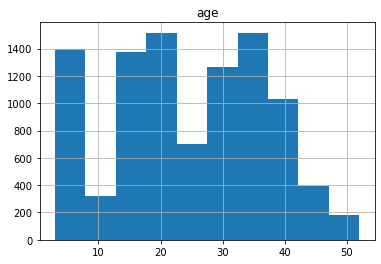

33    656
5     471
34    430
17    389
6     380
30    379
15    358
20    351
21    329
16    310
18    295
31    292
4     286
19    283
40    273
25    266
32    265
22    258
29    248
39    238
38    237
14    219
26    196
7     190
23    169
37    166
42    160
35    154
43    135
41    123
44    116
36    107
13    100
12     88
48     79
28     79
10     76
3      68
8      65
24     58
51     58
9      54
45     50
47     48
46     45
11     34
49     33
27     12
50      8
52      2
Name: age, dtype: int64
50


In [32]:
df1.hist(column='age')
plt.show()
print(df1['age'].value_counts())
print(df1['age'].value_counts().count())

Looking at the towns with the youngest sold flats. As there is a variety of towns (and not just 1 town like Queenstown previously), I will continue to keep these data.

In [33]:
df1[df1['age'] == 3]['town'].value_counts()

SENGKANG      30
HOUGANG       17
QUEENSTOWN    12
WOODLANDS      8
PUNGGOL        1
Name: town, dtype: int64

In [34]:
X = df1.drop('resale_price', axis = 1)
y = df1['resale_price'] / 1000
train, test = train_test_split(df1, test_size=0.2, random_state=67)
train.to_csv(r'data/interim/train_2018_1sthalf.csv', index = False)
test.to_csv(r'data/interim/test_2018_1sthalf.csv', index = False)

It is now early 2019. 2nd half 2018 data is now available. 

In [35]:
def process_data():
    df = fetch_data(r'data/raw/resale-flat-prices-from-jul2018-to-dec2018.csv')
    df = df.drop_duplicates(keep='last')
    df = regroup_storey(df)
    df = make_datetime(df)
    df = create_features(df)
    cols_to_keep = ['town', 'flat_type', 'street_name', 'floor_area_sqm', 'flat_model', 
                    'lease_commence_date', 'resale_price', 'storey', 'yr', 'mth', 'qtr', 'age']
    df = df[cols_to_keep]
    return df

In [36]:
df2 = fetch_data(r'data/raw/resale-flat-prices-from-jul2018-to-dec2018.csv')
df2_dup = df2[df2.duplicated()]
df2_dup

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
618,2018-07,CHOA CHU KANG,4 ROOM,8,TECK WHYE AVE,07 TO 09,92.0,New Generation,1978,58 years 10 months,285000.0
753,2018-07,CLEMENTI,4 ROOM,417,CLEMENTI AVE 1,07 TO 09,96.0,Model A,2013,94 years 02 months,650000.0
1226,2018-07,KALLANG/WHAMPOA,3 ROOM,68,GEYLANG BAHRU,04 TO 06,65.0,Improved,1974,55 years 01 month,275000.0
3493,2018-08,KALLANG/WHAMPOA,3 ROOM,34,JLN BAHAGIA,04 TO 06,56.0,Standard,1970,50 years 10 months,205000.0
4568,2018-08,YISHUN,4 ROOM,445,YISHUN AVE 11,04 TO 06,92.0,Model A,2012,92 years 11 months,390000.0
9831,2018-11,SENGKANG,4 ROOM,297A,COMPASSVALE ST,07 TO 09,94.0,Premium Apartment,2001,81 years 09 months,350000.0


In [37]:
df2 = process_data()
df2

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,yr,mth,qtr,age
0,ANG MO KIO,2 ROOM,ANG MO KIO AVE 4,44.0,Improved,1978,202000.0,2-mid,2018,7,3,40
1,ANG MO KIO,2 ROOM,ANG MO KIO AVE 3,44.0,Improved,1978,210000.0,2-mid,2018,7,3,40
2,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,68.0,New Generation,1981,230000.0,2-mid,2018,7,3,37
3,ANG MO KIO,3 ROOM,ANG MO KIO AVE 3,67.0,New Generation,1979,240000.0,1-low,2018,7,3,39
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,68.0,New Generation,1979,245000.0,1-low,2018,7,3,39
...,...,...,...,...,...,...,...,...,...,...,...,...
11867,YISHUN,5 ROOM,YISHUN ST 72,122.0,Improved,1987,470000.0,2-mid,2018,12,4,31
11868,YISHUN,5 ROOM,YISHUN ST 81,122.0,Improved,1988,500000.0,1-low,2018,12,4,30
11869,YISHUN,5 ROOM,YISHUN ST 81,127.0,Improved,1988,500000.0,2-mid,2018,12,4,30
11870,YISHUN,EXECUTIVE,YISHUN AVE 4,164.0,Apartment,1992,708000.0,2-mid,2018,12,4,26


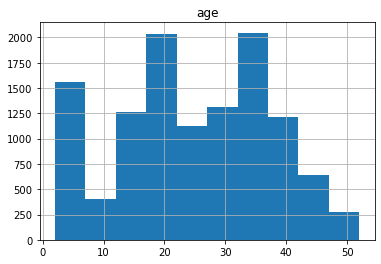

33    811
34    534
17    486
30    478
5     474
21    427
15    414
20    401
31    390
3     381
19    361
18    359
32    353
4     350
29    350
16    346
6     345
40    325
22    318
38    304
25    270
14    263
23    239
39    239
26    237
42    210
35    205
37    190
41    158
43    156
7     155
44    154
36    144
13    130
12    109
48    109
10     91
9      84
28     78
45     67
24     59
46     58
51     56
49     51
47     46
8      45
11     24
27     12
50     10
2       9
52      1
Name: age, dtype: int64
51


In [38]:
df2.hist(column='age')
plt.show()
print(df2['age'].value_counts())
print(df2['age'].value_counts().count())

The youngest sold flats all come from a single town of Bukit Merah. I will drop these data points eventually. 

In [39]:
df2[df2['age'] == 2]

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,yr,mth,qtr,age
482,BUKIT MERAH,5 ROOM,BOON TIONG RD,112.0,Improved,2016,1088000.0,4-higher,2018,7,3,2
2920,BUKIT MERAH,4 ROOM,BOON TIONG RD,92.0,Model A,2016,868000.0,3-high,2018,8,3,2
2937,BUKIT MERAH,5 ROOM,BOON TIONG RD,112.0,Improved,2016,1120000.0,5-skyscraper,2018,8,3,2
4958,BUKIT MERAH,4 ROOM,BOON TIONG RD,93.0,Model A,2016,1018000.0,5-skyscraper,2018,9,3,2
8886,BUKIT MERAH,4 ROOM,BOON TIONG RD,92.0,Model A,2016,1008888.0,5-skyscraper,2018,11,4,2
8887,BUKIT MERAH,4 ROOM,BOON TIONG RD,92.0,Model A,2016,912888.0,4-higher,2018,11,4,2
8888,BUKIT MERAH,4 ROOM,BOON TIONG RD,93.0,Model A,2016,1008000.0,5-skyscraper,2018,11,4,2
10699,BUKIT MERAH,4 ROOM,BOON TIONG RD,92.0,Model A,2016,1000000.0,5-skyscraper,2018,12,4,2
10733,BUKIT MERAH,5 ROOM,BOON TIONG RD,112.0,Improved,2016,1150000.0,5-skyscraper,2018,12,4,2


In [40]:
X = df2.drop('resale_price', axis = 1)
y = df2['resale_price'] / 1000
train, test = train_test_split(df2, test_size=0.2, random_state=67)
train.to_csv(r'data/interim/train_2018_2ndhalf.csv', index = False)
test.to_csv(r'data/interim/test_2018_2ndhalf.csv', index = False)

In [ ]:
# This portion is work in progress.
df2018 = pd.read_csv(r"data/raw/resale-flat-prices-based-on-registration-date-from-jan2018-to-jun2018.csv")
df2018 = process_data(df2018)
df2018
train, test = train_test_split(df2018, test_size=0.2, random_state=67)
history = fetch_data(r'data/interim/train.csv')
combined = pd.concat([history, train])

In [41]:
%load_ext autoreload
%autoreload 2
from src.datapipeline.datapipeline import Datapipeline

In [43]:
%reload_ext autoreload
from src.datapipeline.datapipeline import Datapipeline

In [44]:
dp = Datapipeline()
X_train, y_train = dp.get_train_data_regression()
X_test, y_test = dp.get_test_data_regression()

In [45]:
X_train

,floor_area_sqm,lease_commence_date,age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,storey,yr,mth,qtr
0,-1.398320,-0.444422,0.400586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0
1,0.264430,-0.618230,0.661622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,2.010319,-0.270613,0.226562,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.763256,0.772239,-0.817581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.650082,-0.705135,0.661622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,-1.190476,1.901996,-1.861723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,2.0
31756,-0.566945,-0.531326,0.487598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0
31757,0.596981,1.380570,-1.339652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2.0
31758,-0.982632,-0.444422,0.400586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
y_train

9810     245.000
21909    380.000
144      830.000
1861     430.000
11457    338.000
          ...   
33759    373.000
13200    357.000
31820    468.000
1740     333.000
21323    462.688
Name: resale_price, Length: 31760, dtype: float64

In [47]:
X_test

,floor_area_sqm,lease_commence_date,age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,storey,yr,mth,qtr
0,0.513843,0.772239,-0.817581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,0.347568,0.250813,-0.208497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,2.0
2,-1.356751,-1.574178,1.531741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2.0
3,-0.566945,-0.357517,0.313574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.012668,0.598430,-0.556545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,-1.356751,-1.400369,1.357717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
7936,-0.525376,1.119857,-1.078616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0
7937,0.264430,-0.270613,0.313574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0
7938,0.430706,0.337717,-0.295509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,2.0


In [48]:
y_test

3696     460.0
29867    360.0
12191    360.0
1224     315.0
32307    465.0
         ...  
9355     333.0
28555    390.0
32412    420.0
33293    395.0
8383     290.0
Name: resale_price, Length: 7940, dtype: float64

In [ ]:
# This portion is work in progress.
%load_ext autoreload
%autoreload 2
from src.datapipeline.combinepipeline import Combinepipeline

%reload_ext autoreload
from src.datapipeline.combinepipeline import Combinepipeline

cp = Combinepipeline()
X_train, y_train = cp.get_train_data_regression()

Regression problem. Models are evaluated using Root Mean Squared Error. Here are 3 baseline models (with no hyperparameter tuning done yet) of Linear Regression, K Neighbors Regressor and Random Forest Regressor. 

In [49]:
# Linear Regression
%load_ext autoreload
%autoreload 2
from src.modelling.linear_regression import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.modelling.linear_regression import Model

In [50]:
model = Model()
model.evaluate(X_train, y_train, X_test, y_test)

The Test RMSE for Linear Regression is 4116343494.8402724


In [51]:
# K Neighbors Regressor
%load_ext autoreload
%autoreload 2
from src.modelling.kneighbors_regressor import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.kneighbors_regressor import Model

In [52]:
model = Model()
model.evaluate(X_train, y_train, X_test, y_test)

The Test RMSE for K Neighbors Regressor is 44.20666453594592


In [53]:
# Random Forest Regressor
%load_ext autoreload
%autoreload 2
from src.modelling.random_forest_regressor import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.random_forest_regressor import Model

In [54]:
model = Model()
model.evaluate(X_train, y_train, X_test, y_test)

The Test RMSE for Random Forest Regressor is 28.740128212134017


Classification problem. Models are evaluated using Accuracy Score. Here are 3 baseline models (with no hyperparameter tuning done yet) of Logistic Regression, K Neighbors Classifier and Random Forest Classifier. KBinsDiscretizer of 5 bins with quantitle strategy is used on the target. 

In [55]:
dp = Datapipeline()
X_train, y_train = dp.get_train_data_classification()
X_test, y_test = dp.get_test_data_classification()

In [56]:
X_train

,floor_area_sqm,lease_commence_date,age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,storey,yr,mth,qtr
0,-1.398320,-0.444422,0.400586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0
1,0.264430,-0.618230,0.661622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,2.010319,-0.270613,0.226562,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.763256,0.772239,-0.817581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.650082,-0.705135,0.661622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,-1.190476,1.901996,-1.861723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,2.0
31756,-0.566945,-0.531326,0.487598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0
31757,0.596981,1.380570,-1.339652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2.0
31758,-0.982632,-0.444422,0.400586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
y_train

array([0., 1., 4., ..., 3., 1., 3.])

In [58]:
X_test

,floor_area_sqm,lease_commence_date,age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,storey,yr,mth,qtr
0,0.513843,0.772239,-0.817581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,0.347568,0.250813,-0.208497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,2.0
2,-1.356751,-1.574178,1.531741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2.0
3,-0.566945,-0.357517,0.313574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.012668,0.598430,-0.556545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,-1.356751,-1.400369,1.357717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
7936,-0.525376,1.119857,-1.078616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0
7937,0.264430,-0.270613,0.313574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0
7938,0.430706,0.337717,-0.295509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,2.0


In [59]:
y_test

array([3., 1., 1., ..., 2., 2., 0.])

In [61]:
# Logistic Regression
%load_ext autoreload
%autoreload 2
from src.modelling.logistic_regression import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.modelling.logistic_regression import Model

In [62]:
model = Model()
model.evaluate(X_train, y_train.ravel(), X_test, y_test.ravel())

The Test accuracy score for Logistic Regression is 0.7379093198992444


C:\Users\des\anaconda3\envs\hdbenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
# K Neighbors Classifier
%load_ext autoreload
%autoreload 2
from src.modelling.kneighbors_classifier import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.modelling.kneighbors_classifier import Model

In [64]:
model = Model()
model.evaluate(X_train, y_train, X_test, y_test)

The Test accuracy score for K Neighbors Classifier is 0.7299748110831235


In [65]:
# Random Forest Classifier
%load_ext autoreload
%autoreload 2
from src.modelling.random_forest_classifier import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from src.modelling.random_forest_classifier import Model

In [66]:
model = Model()
model.evaluate(X_train, y_train, X_test, y_test)

The Test accuracy score for Random Forest Classifier is 0.7957178841309823
